In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score

In [ ]:
#  Importing essential libraries
import numpy as np               # Numerical computing
import pandas as pd              # Data manipulation
import os                        # Operating system interaction
import matplotlib.pyplot as plt  # Static plotting
import seaborn as sns            # Statistical data visualization
import plotly.express as px      # Interactive visualizations

#  Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#  Load the Dataset
df = pd.read_csv('/content/drive/MyDrive/archive (2)/Crop_recommendation.csv')

#  Preview the Top Rows
df.head(3)

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice

In [ ]:
# Numerical columns (float/int features)
numerical_columns = [column for column in df.columns if df[column].dtype != 'O']

# Categorical columns (object/string features)
categorical_columns = [column for column in df.columns if df[column].dtype == 'O']

#  Crop Recommendation Dataset – Exploratory Data Analysis

In [ ]:
"""
 Crop Recommendation - Exploratory Data Analysis
--------------------------------------------------
In this notebook, we aim to explore a crop recommendation dataset using
various data visualization tools. The goal is to uncover insights related
to soil nutrients, climate features, and their influence on crop suitability.
Also train different models on this dataset.

We'll use:
- NumPy & Pandas for data handling
- Matplotlib & Seaborn for static visualizations
- Plotly for interactive plots
"""

# Set Seaborn theme for cleaner plots
sns.set_theme(style='whitegrid')

##  Distribution of Crops
Goal: See how the dataset is balanced among crops.

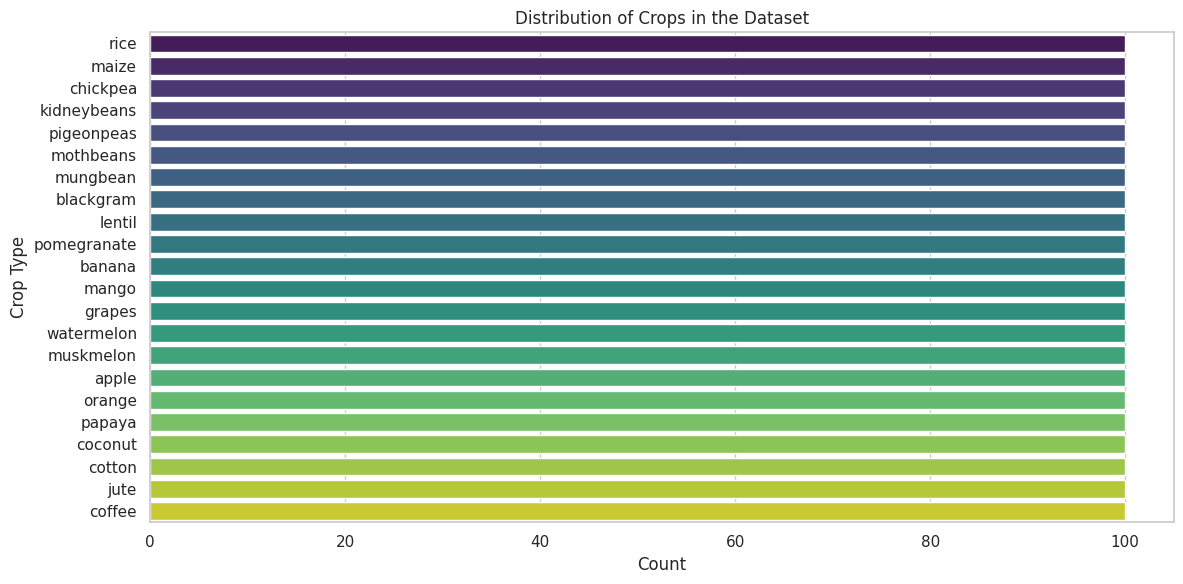

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='label', order=df['label'].value_counts().index, palette='viridis')
plt.title('Distribution of Crops in the Dataset')
plt.xlabel('Count')
plt.ylabel('Crop Type')
plt.tight_layout()
plt.show()

##  Soil Nutrient Distribution
Goal: Understand the spread of Nitrogen (N), Phosphorus (P), and Potassium (K).

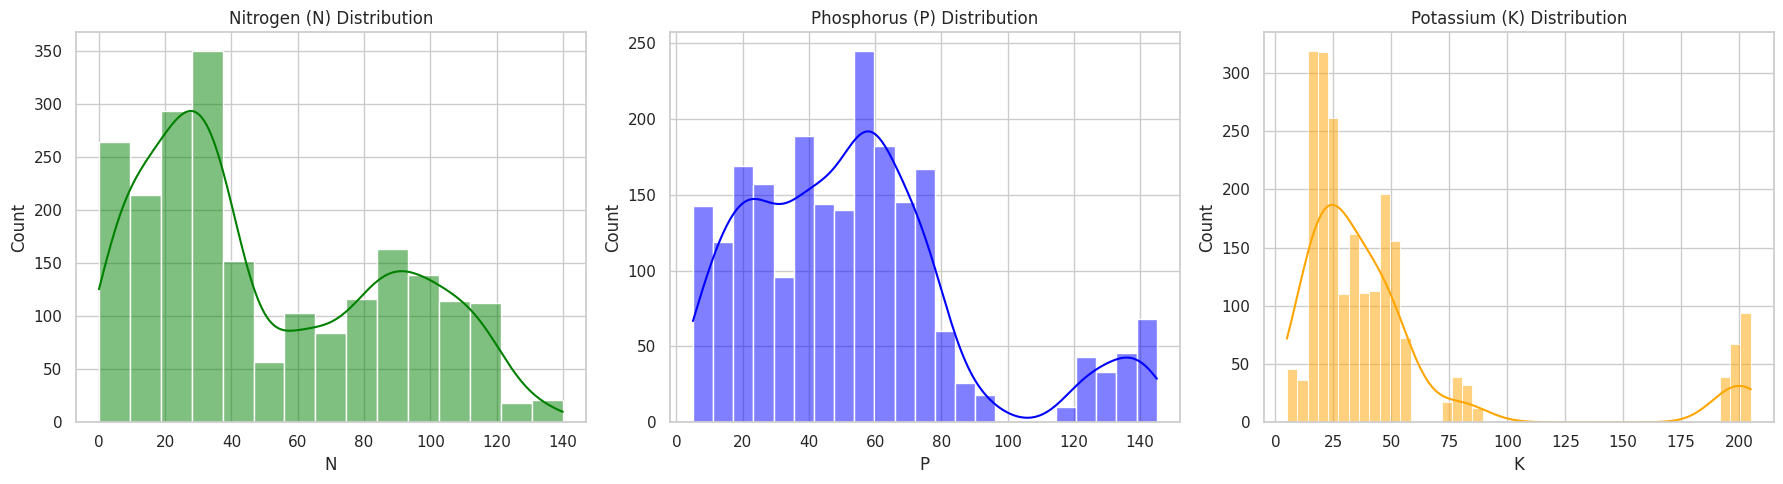

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['N'], kde=True, ax=axes[0], color='green')
axes[0].set_title('Nitrogen (N) Distribution')
sns.histplot(df['P'], kde=True, ax=axes[1], color='blue')
axes[1].set_title('Phosphorus (P) Distribution')
sns.histplot(df['K'], kde=True, ax=axes[2], color='orange')
axes[2].set_title('Potassium (K) Distribution')
plt.tight_layout()
plt.show()

##  Climate Factors – Temperature, Humidity, Rainfall
Goal: See how these climate features vary.

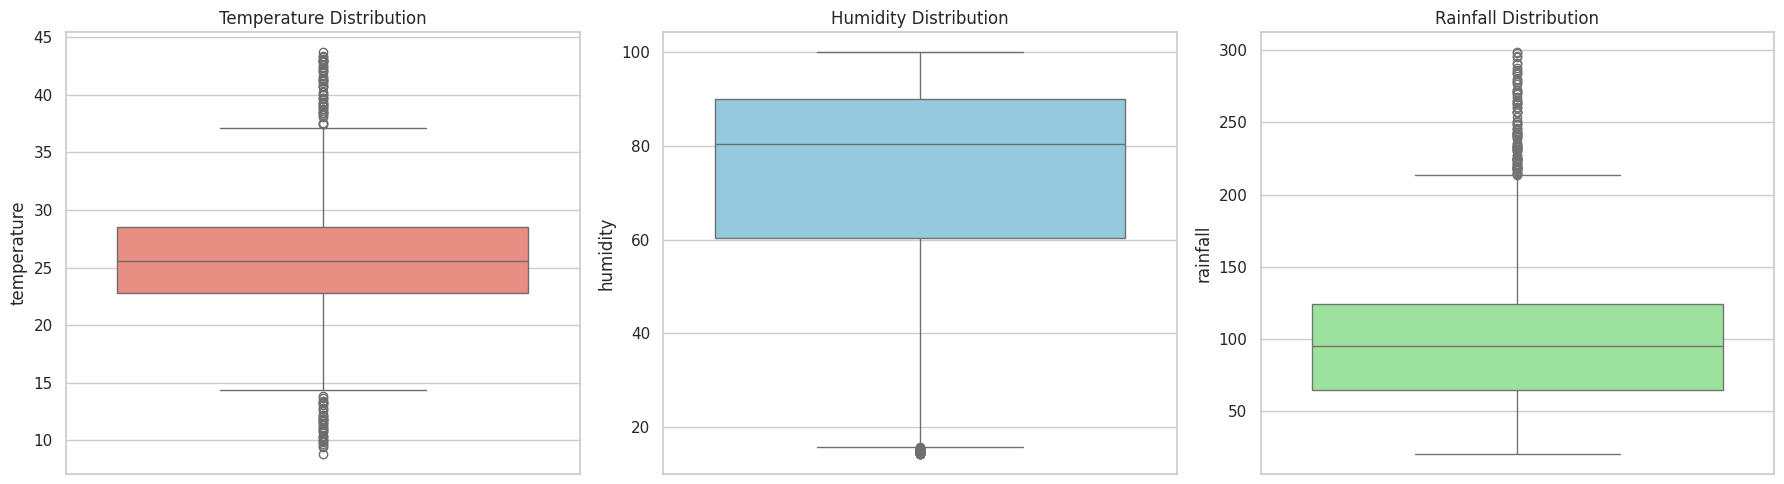

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(data=df, y='temperature', ax=axes[0], color='salmon')
axes[0].set_title('Temperature Distribution')
sns.boxplot(data=df, y='humidity', ax=axes[1], color='skyblue')
axes[1].set_title('Humidity Distribution')
sns.boxplot(data=df, y='rainfall', ax=axes[2], color='lightgreen')
axes[2].set_title('Rainfall Distribution')
plt.tight_layout()
plt.show()

##  Crop vs Nutrient Needs (Plotly for interaction)
Goal: Understand which crops prefer what nutrient levels.

In [ ]:
fig = px.box(df, x="label", y="N", color="label", title="Nitrogen Content by Crop")
fig.update_layout(showlegend=False)
fig.show(renderer="notebook")

##  Crop-wise pH Range
Goal: Identify ideal soil pH for each crop.

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='label', y='ph', data=df)
plt.xticks(rotation=90)
plt.title('Soil pH Distribution by Crop')
plt.tight_layout()
plt.show()

##  Pairplot
Goal: Visualize relationships between all numeric variables.

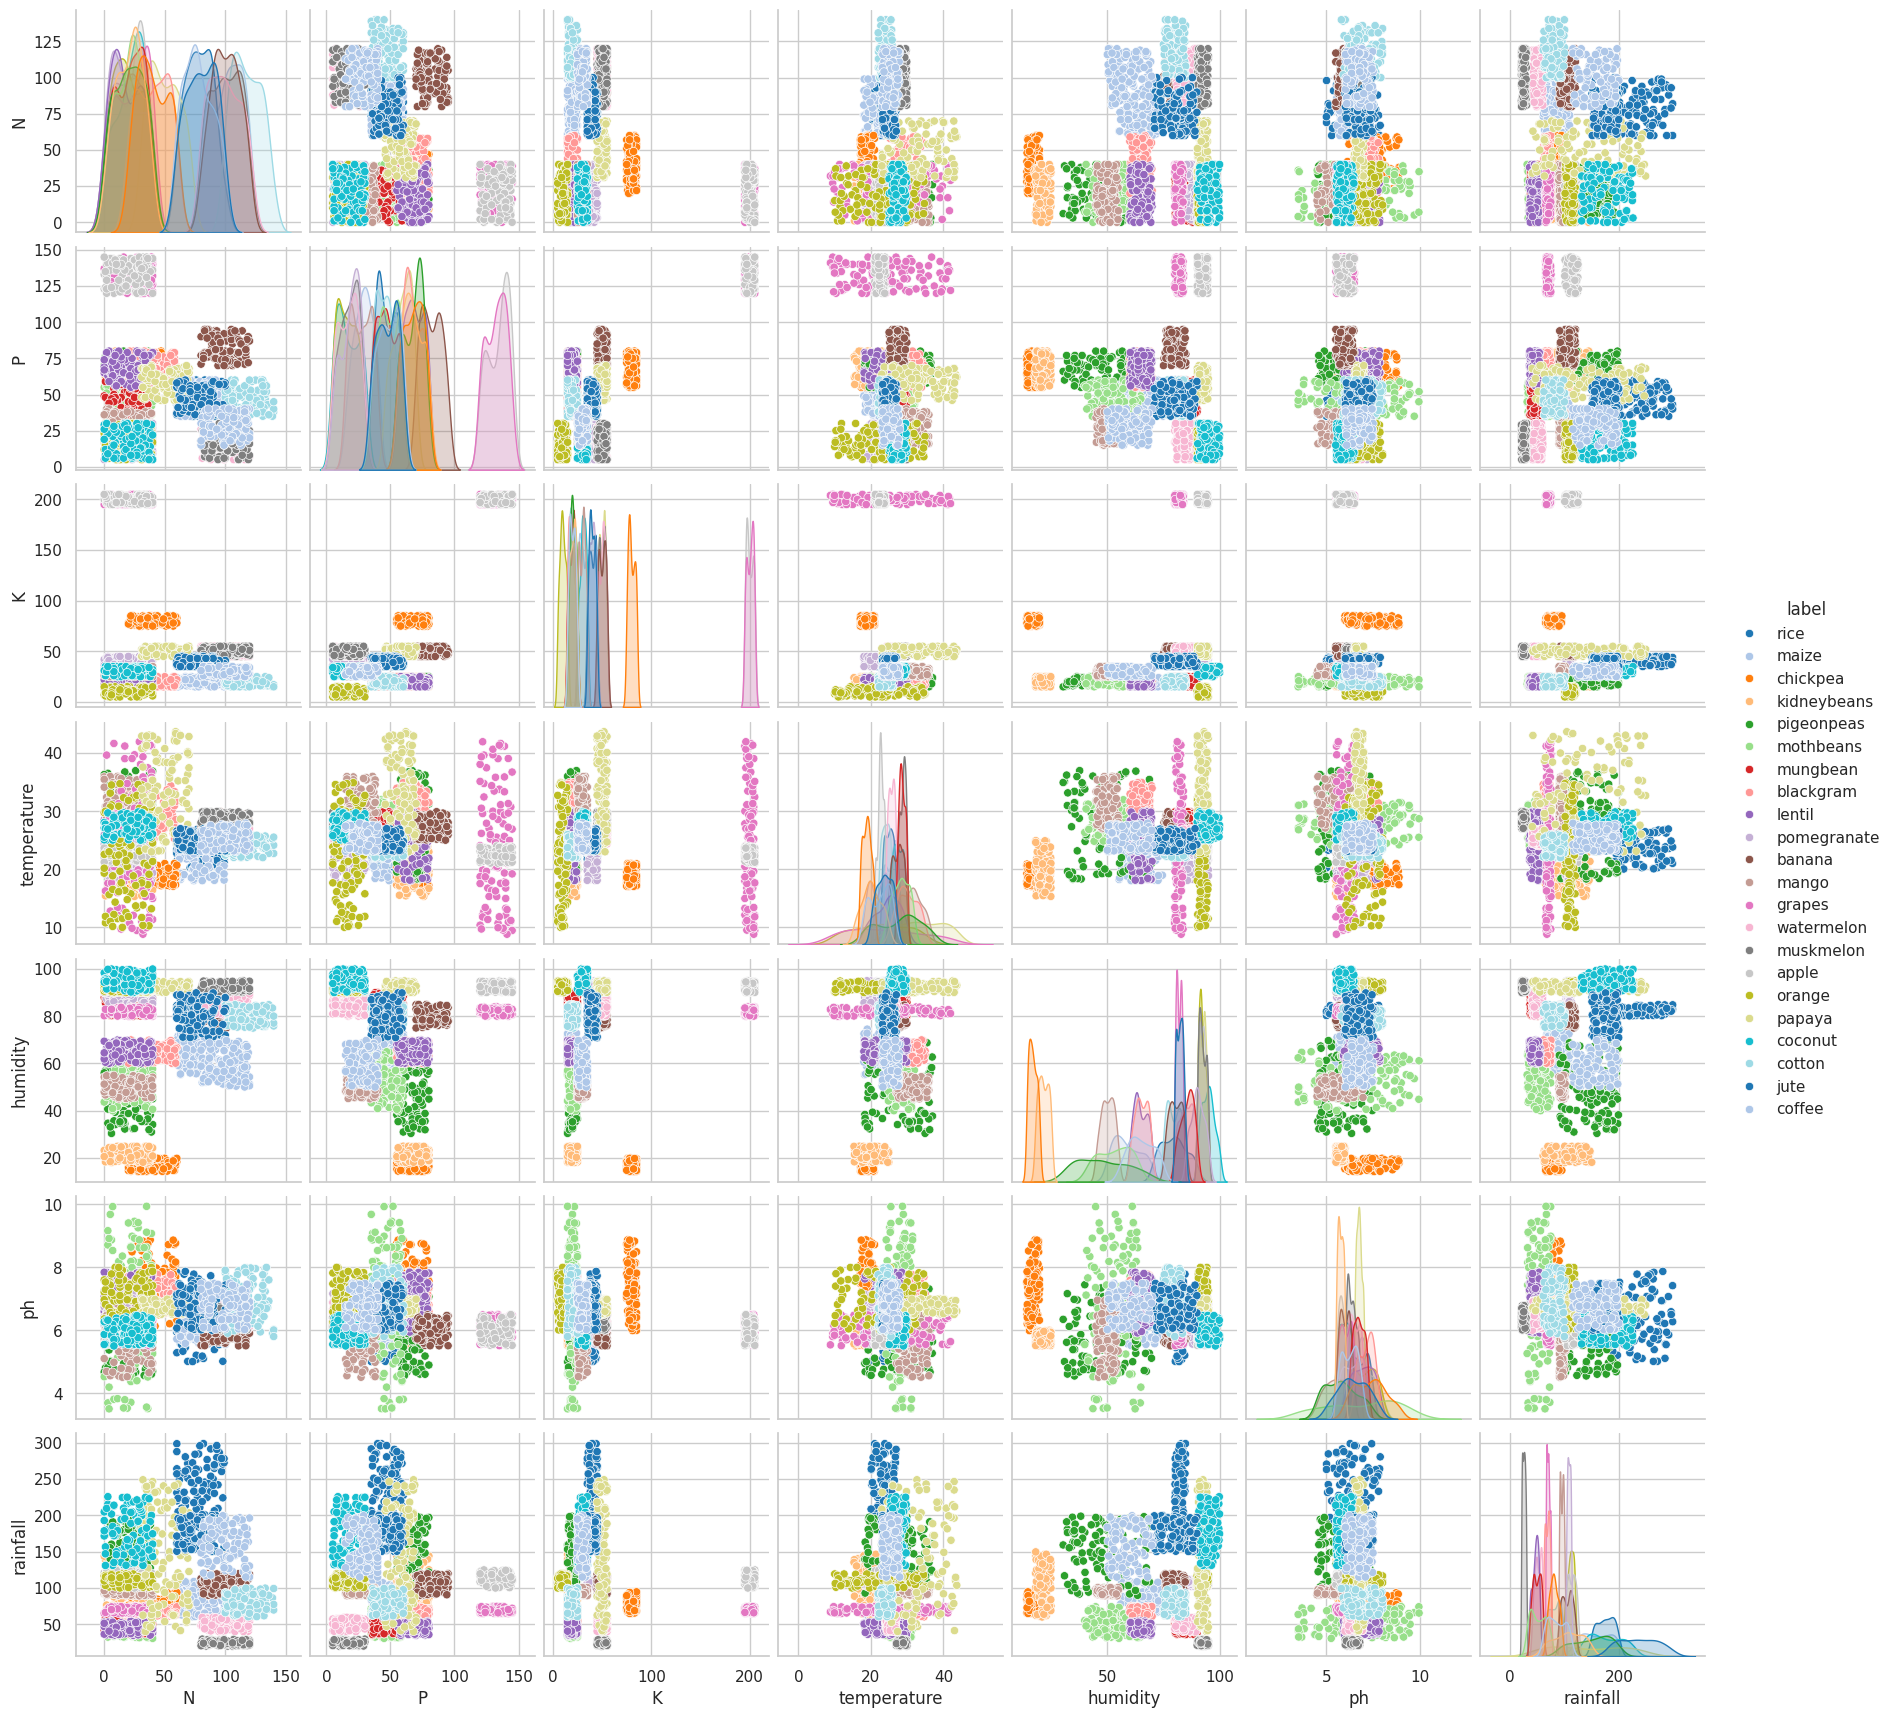

In [ ]:
sns.pairplot(df, hue='label', palette='tab20')
plt.show()

## Heatmap – Feature Correlation
Goal: Check multicollinearity among features.

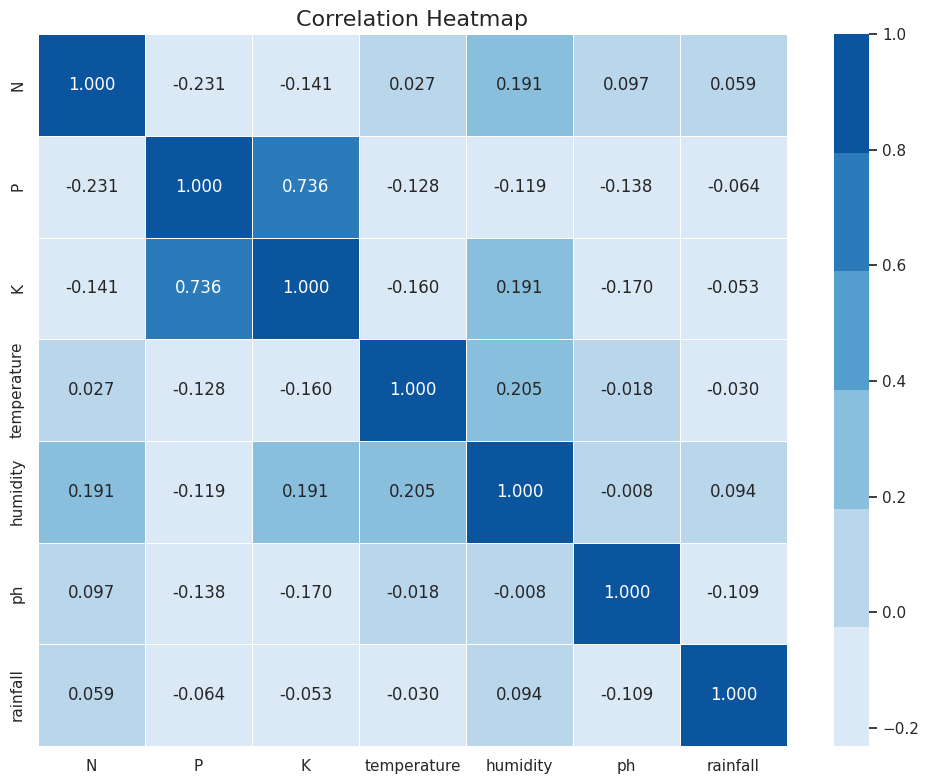

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap=sns.color_palette("Blues") , fmt=".3f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

# Model Training and Evaluation

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/archive (2)/Crop_recommendation.csv")
data.head(5)

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

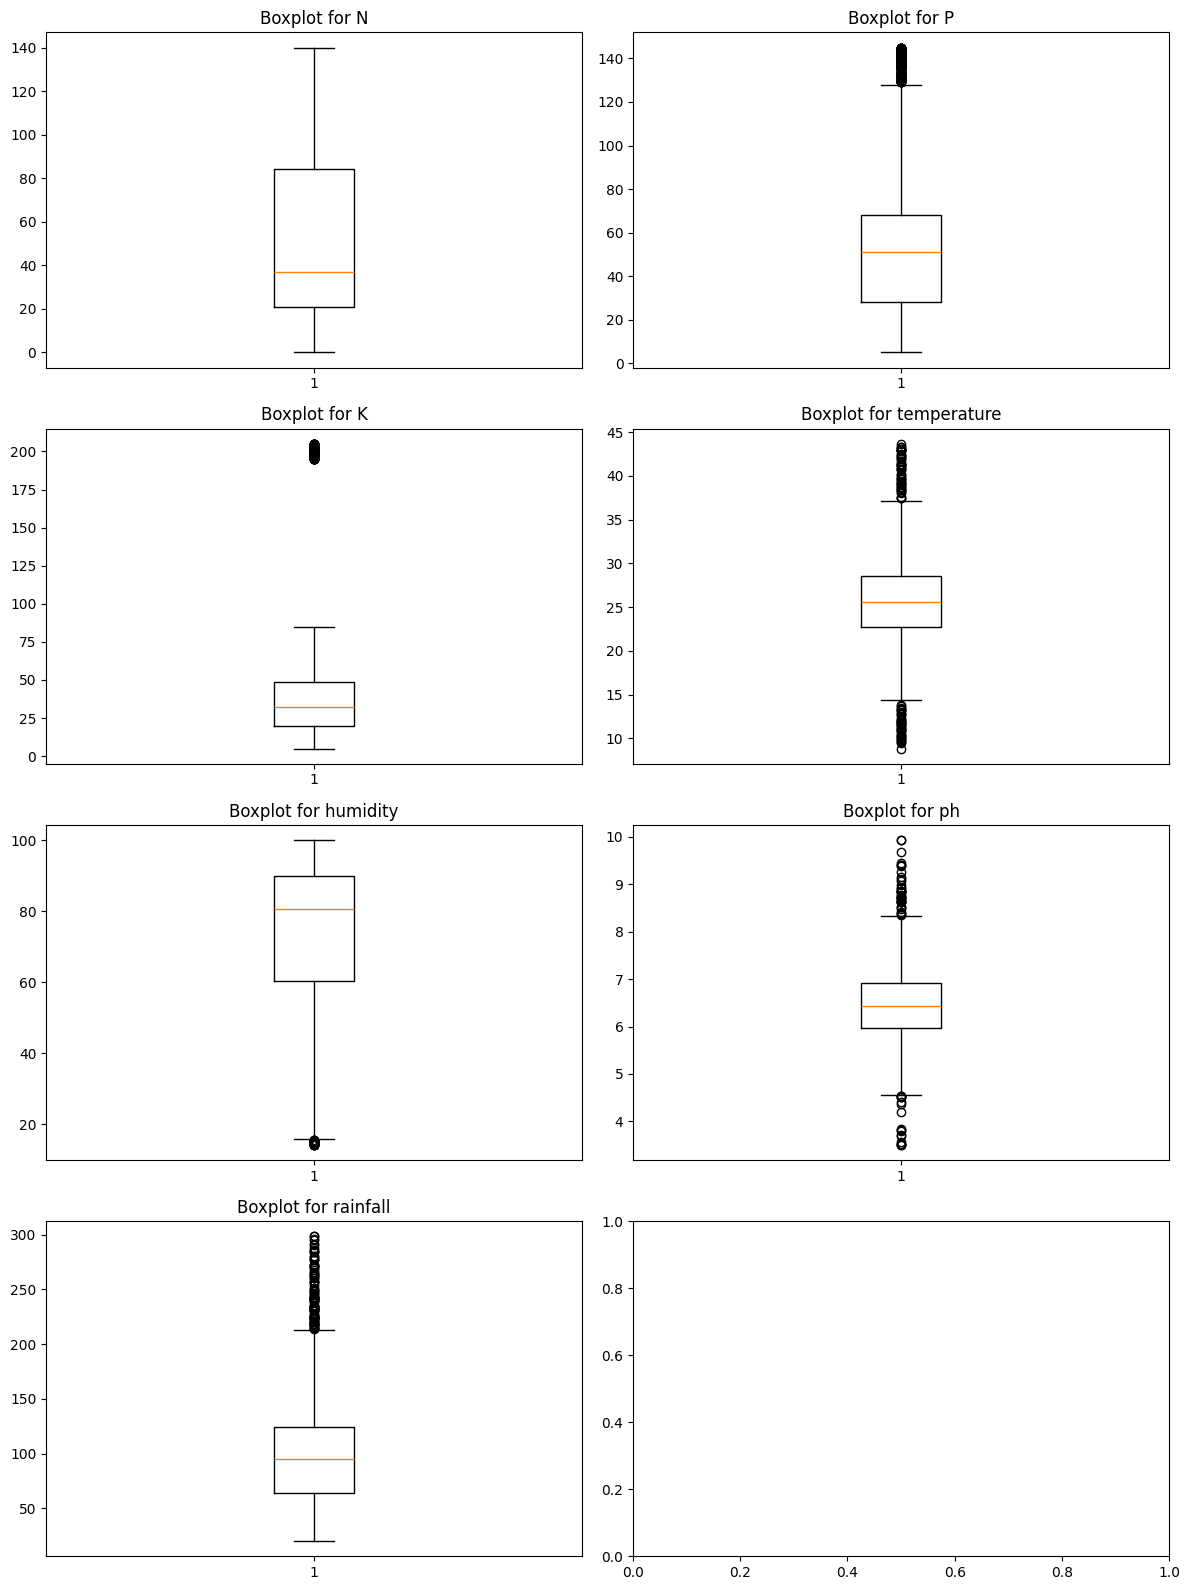

In [ ]:
num_col = data.select_dtypes(include="number")
cols = num_col.columns
n = len(cols)
fig, axs = plt.subplots(4, 2, figsize=(12, 16))
axs = axs.ravel()
for i in range(n):
    axs[i].boxplot(data[cols[i]].dropna())
    axs[i].set_title(f"Boxplot for {cols[i]}")
plt.tight_layout()
plt.show()

# Distribution of Crops

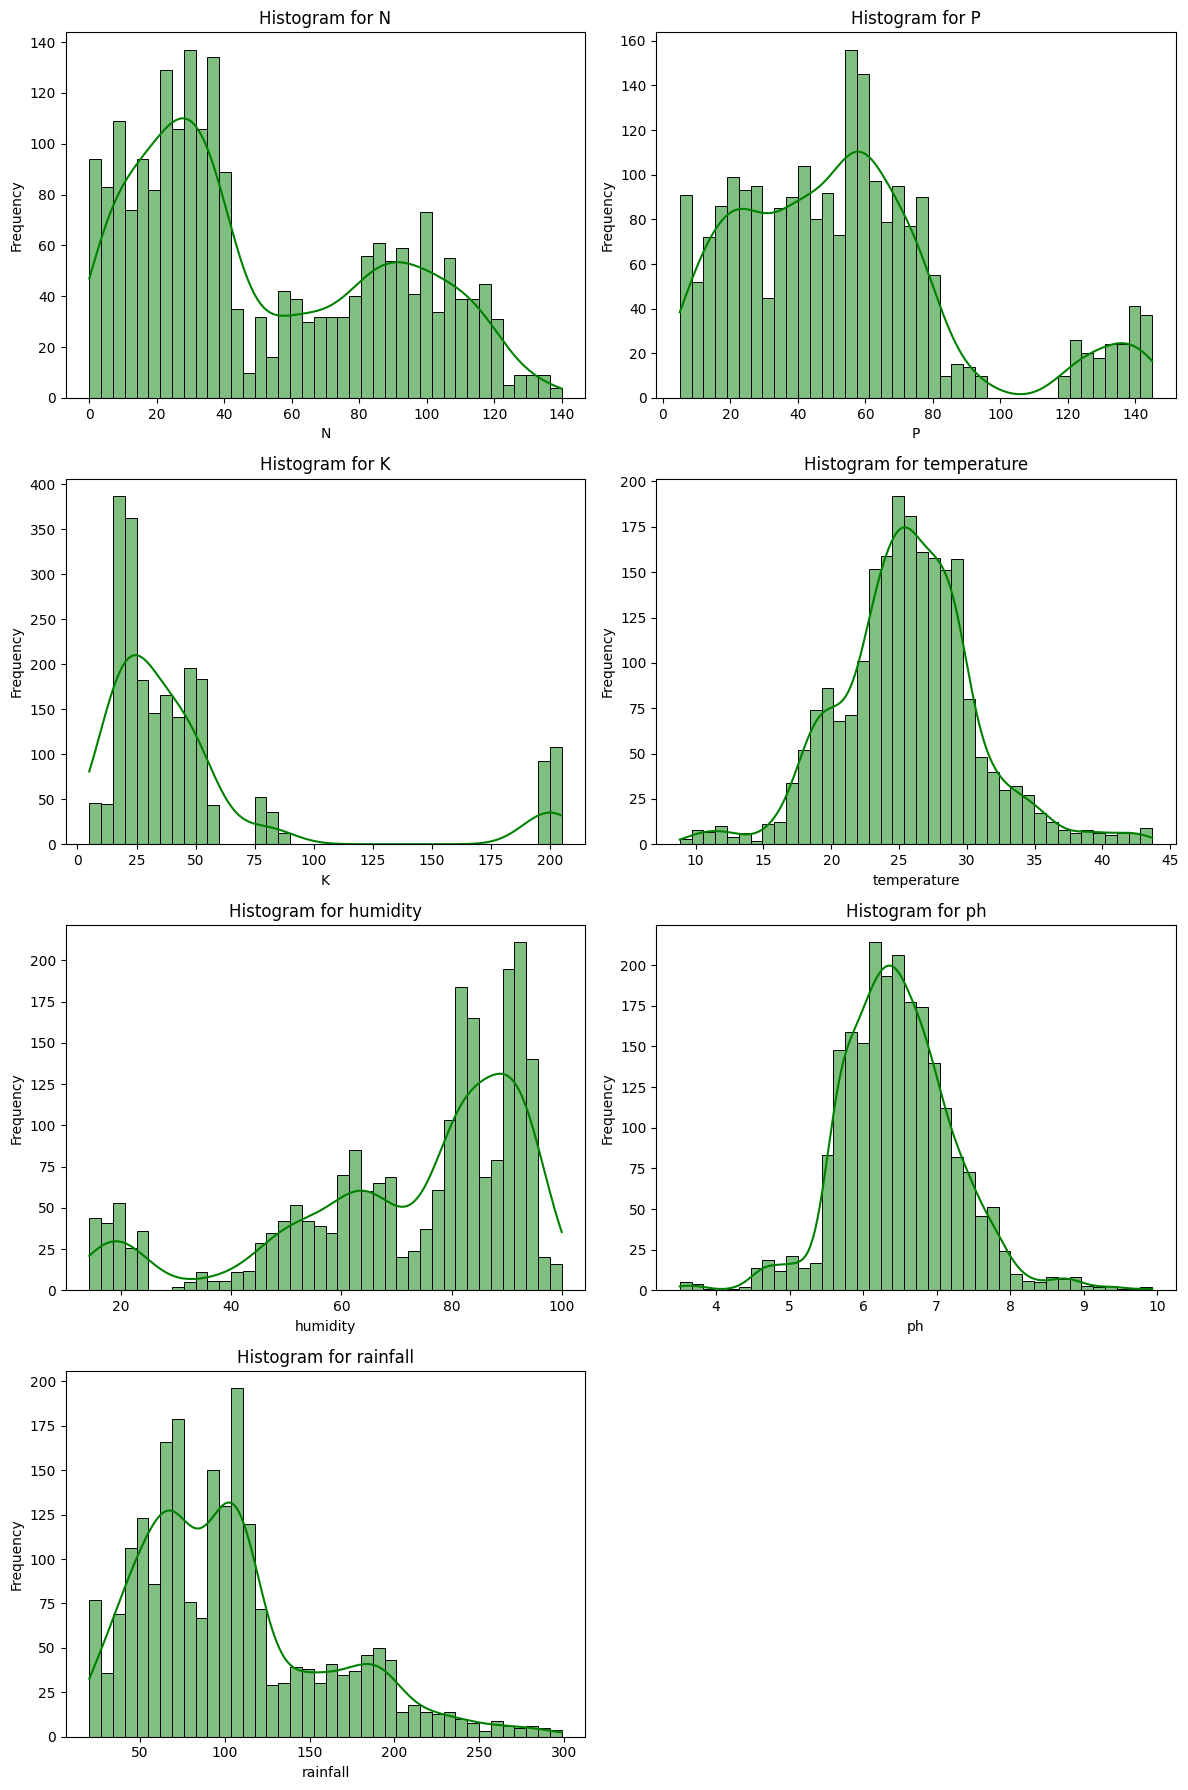

In [ ]:
fig,axs=plt.subplots(4,2,figsize=(12,18))
axs=axs.ravel()
for i in range(n):
    sns.histplot(data[cols[i]], bins=40, kde=True, ax=axs[i], color="green")
    axs[i].set_title(f"Histogram for {cols[i]}")
    axs[i].set_ylabel("Frequency")
for j in range(n, len(axs)):
    fig.delaxes(axs[j])
plt.tight_layout()
plt.show()

# Average Temp for crops

<ipython-input-11-e25122afe2b2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="label",x="temperature",data=grouped_label_data,palette="YlGnBu")


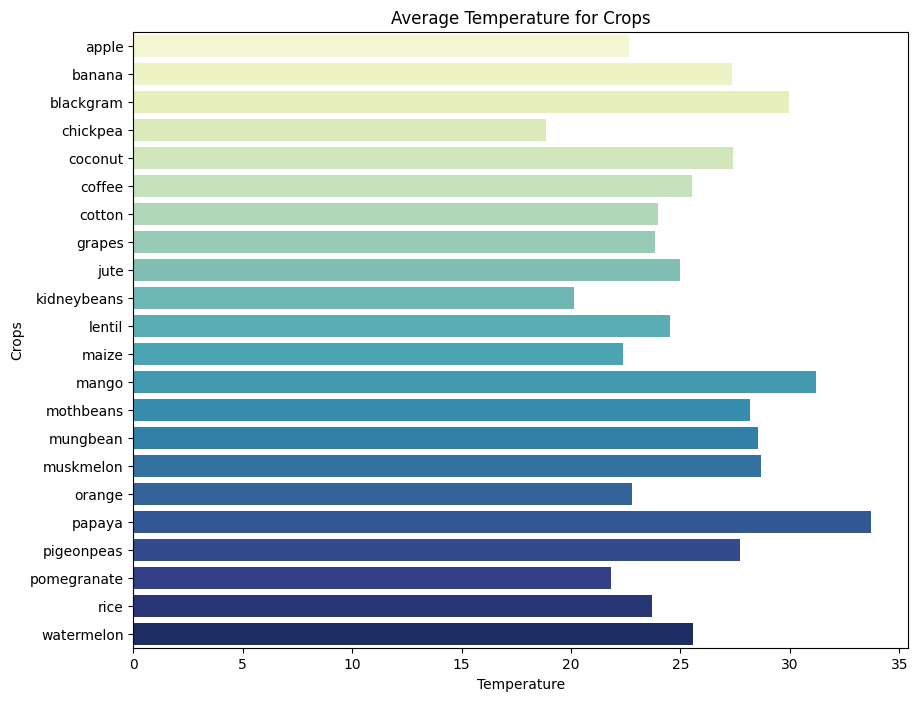

In [ ]:
grouped_label_data=data.groupby("label")["temperature"].mean().reset_index()
plt.figure(figsize=(10,8))
sns.barplot(y="label",x="temperature",data=grouped_label_data,palette="YlGnBu")
plt.ylabel("Crops")
plt.title("Average Temperature for Crops")
plt.xlabel("Temperature")
plt.show()

# Measure of N, P, K Levels per Crops

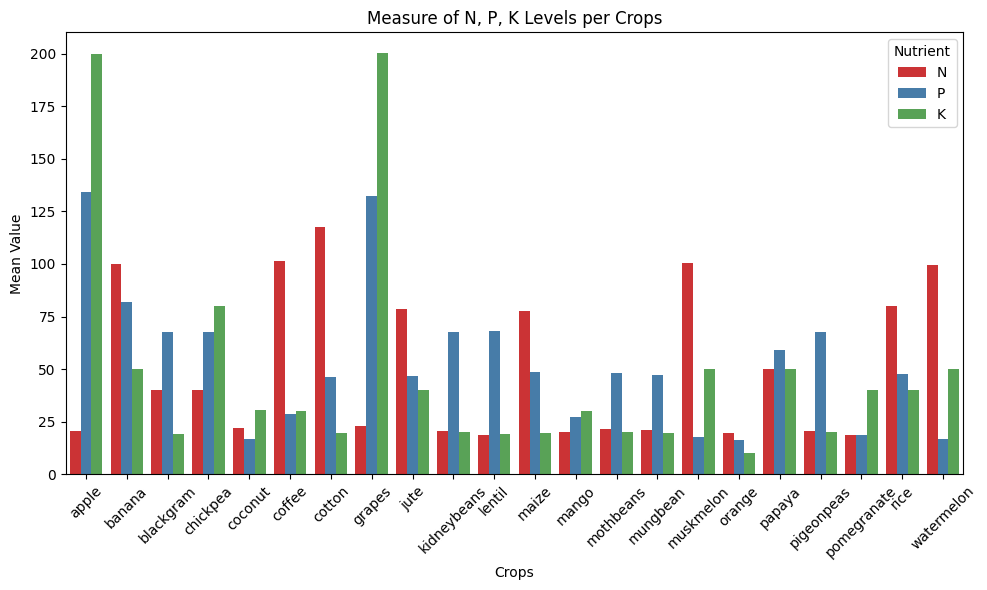

In [ ]:
group_npk = data.groupby("label")[["N", "P", "K"]].mean().reset_index()
melted = group_npk.melt(id_vars="label", value_vars=["N", "P", "K"],var_name="Nutrient", value_name="Mean Value")

plt.figure(figsize=(10,6))
sns.barplot(x="label", y="Mean Value", hue="Nutrient", data=melted, palette="Set1")
plt.title("Measure of N, P, K Levels per Crops")
plt.ylabel("Mean Value")
plt.xlabel("Crops")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Predictive Modeling

In [ ]:
x=data.drop(["label"],axis=1)
y=data["label"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.9931818181818182
F1 Score: 0.9926374055074331
Precision: 0.9925757575757576
Recall: 0.9933213716108454
ROC AUC: 0.9999237228233401


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
  

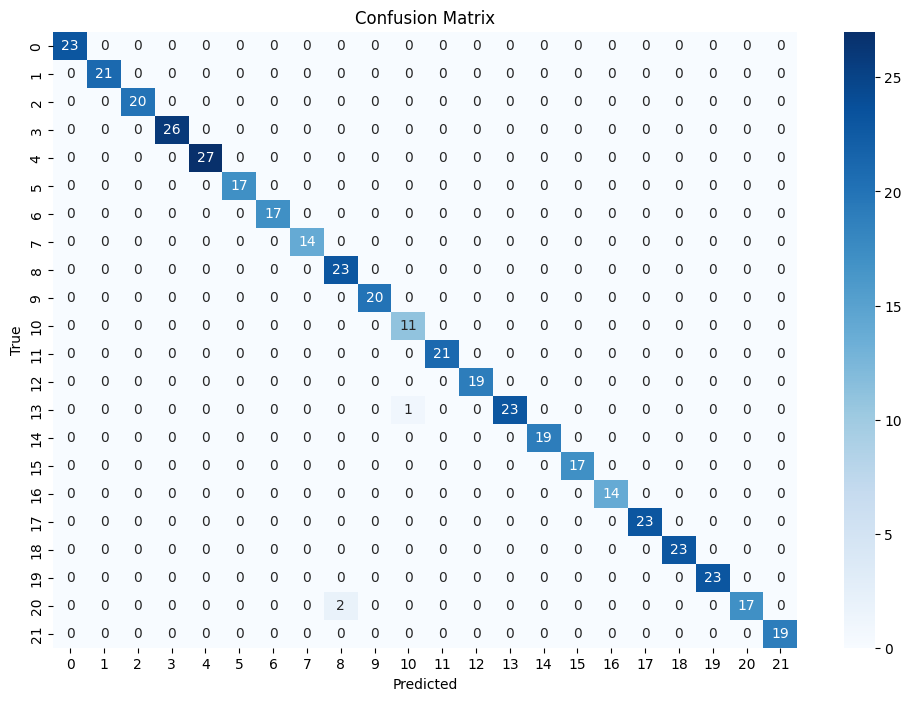

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import pickle
with open("model.pkl","wb") as file:
    pickle.dump(model,file)

In [ ]:
with open("model.pkl","rb") as file:
    clf=pickle.load(file)

In [ ]:
X_new=[[80,40,42,28,88,6.67,212]]
y_predi = clf.predict(X_new)
print("Predictions:", y_predi)

Predictions: ['apple']


In [ ]:
# 📦 Scikit-learn: Model Imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

# 🧪 Model Evaluation & Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# 🎯 Define target variable and features
target = 'label'

# 🧾 X -> Feature matrix | y -> Target labels
X = df.drop(columns=[target])
y = df[target]

In [ ]:
# 🧪 Splitting the dataset into train and test sets (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% for testing
    random_state=42,      # Ensures reproducibility
    shuffle=True          # Shuffles data before splitting
)

In [ ]:
# ⚖️ Standardizing the features using StandardScaler
st_scaler = StandardScaler()

# Fit on training data and transform both train & test sets
X_train_transformed = st_scaler.fit_transform(X_train)
X_test_transformed = st_scaler.transform(X_test)

In [ ]:
models = {
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC':SVC(),
    'MLPClassifier': MLPClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}

In [ ]:
# 🧠 Loop through each model and train it
for name, model in models.items():
    # Tree-based models do not require feature scaling
    is_tree = any(tree in name for tree in ['Tree', 'Forest', 'Boost', 'Bagging', 'XGB', 'Extra'])

    # Train and predict
    if is_tree:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_transformed, y_train)
        y_pred = model.predict(X_test_transformed)

    # 🎯 Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: accuracy = {accuracy:.3f}")

LogisticRegression: accuracy = 0.964
KNeighborsClassifier: accuracy = 0.957
SVC: accuracy = 0.968
MLPClassifier: accuracy = 0.977
RandomForestClassifier: accuracy = 0.993
GradientBoostingClassifier: accuracy = 0.982
AdaBoostClassifier: accuracy = 0.145
BaggingClassifier: accuracy = 0.986
ExtraTreesClassifier: accuracy = 0.989
DecisionTreeClassifier: accuracy = 0.986
